In [19]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
predictions = model(x_train[:1]).numpy()
print(predictions)
print(tf.nn.softmax(predictions).numpy())
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(loss_fn(y_train[:1], predictions).numpy())
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

[[-0.18865934 -0.40550438  1.0344131  -0.15207873  0.5383954   0.34456265
  -0.830083    0.06436893  0.06729744 -0.13170783]]
[[0.07053142 0.05678165 0.23963831 0.07315928 0.14592795 0.12021483
  0.03713778 0.09083881 0.09110522 0.07466488]]
2.118475


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
probability_model(x_test[:5])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2992 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1466 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1102 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0896 - accuracy: 0.9720
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0774 - accuracy: 0.9754
313/313 - 0s - loss: 0.0707 - accuracy: 0.9771 - 320ms/epoch - 1ms/step


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.1031954e-07, 1.3868466e-08, 2.1804508e-05, 4.9868837e-04,
        1.9379488e-10, 5.4933726e-06, 3.1860102e-13, 9.9946493e-01,
        6.1709568e-07, 8.1600747e-06],
       [4.9359016e-08, 3.8784798e-05, 9.9995506e-01, 5.2714254e-06,
        3.0795746e-14, 6.4722900e-07, 2.3705581e-08, 8.4398010e-14,
        2.1150407e-07, 6.8485502e-11],
       [1.9680160e-06, 9.9896514e-01, 1.3883693e-04, 1.8679906e-05,
        6.0309252e-05, 1.5819214e-06, 2.8403543e-05, 6.7243626e-04,
        1.0932995e-04, 3.3601793e-06],
       [9.9956590e-01, 7.3301869e-08, 1.9921707e-04, 4.8821335e-06,
        6.0011480e-06, 4.3810014e-06, 8.9757355e-05, 8.9387897e-05,
        8.7536750e-07, 3.9554805e-05],
       [1.6017430e-06, 3.6584917e-09, 2.5768450e-06, 2.3391816e-08,
        9.9808240e-01, 3.5901107e-06, 4.9248614e-05, 1.7661105e-05,
        1.7050139e-06, 1.8412150e-03]], dtype=float32)>

In [6]:
def getCustomData(path: str) -> tuple:
    data, labels = [], []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".png"):
                img = cv2.imread(os.path.join(root, file), cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
                img = 255 - img
                img = img / 255.0
                img = np.expand_dims(img, -1)
                data.append(img)
                labels.append(int(os.path.split(root)[-1]))
    return np.array(data), np.array(labels)

1/1 - 0s - loss: 1.8187 - accuracy: 0.7000 - 19ms/epoch - 19ms/step
1/1 [==============================] - 0s 19ms/step
Prediction: 9
Label: 0


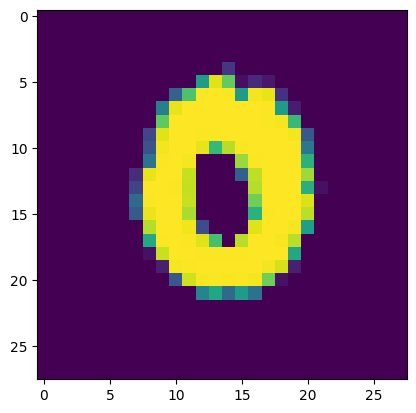

Prediction: 9
Label: 4


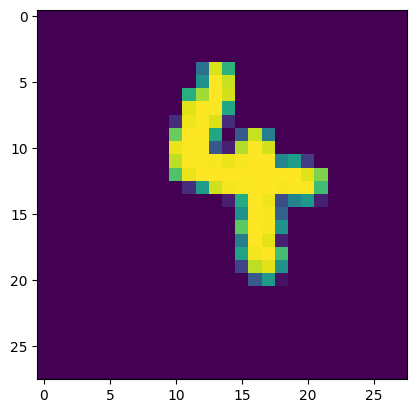

Prediction: 9
Label: 4


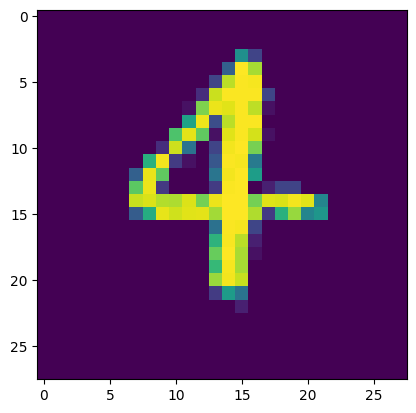

Prediction: 2
Label: 7


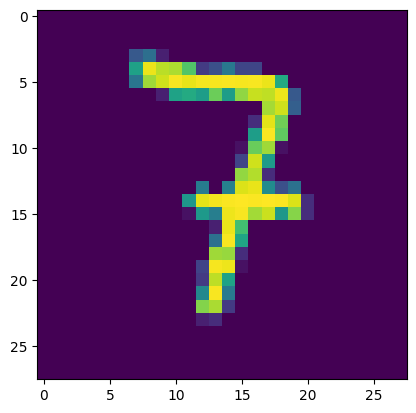

Prediction: 2
Label: 7


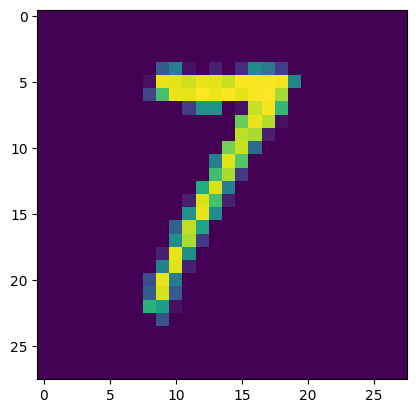

Prediction: 3
Label: 8


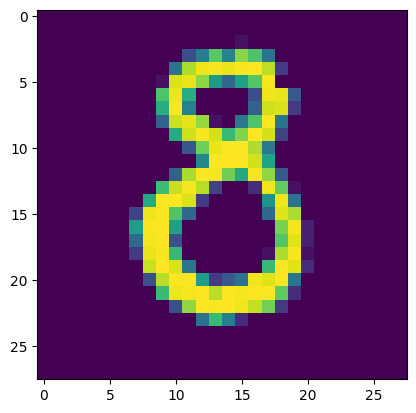

Prediction: 3
Label: 9


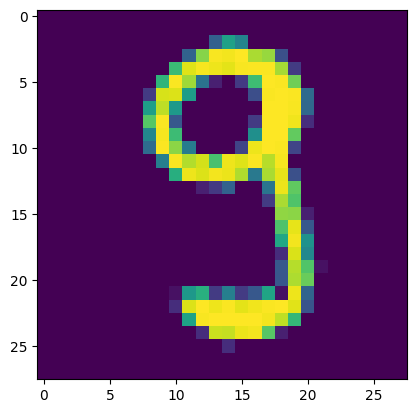

Prediction: 3
Label: 9


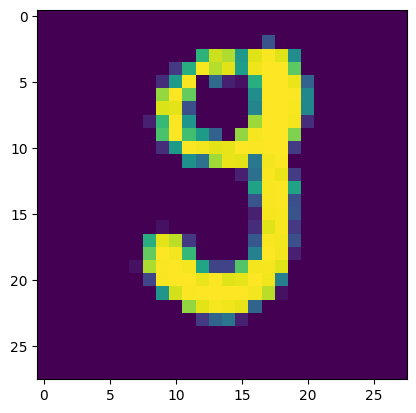

Prediction: 3
Label: 9


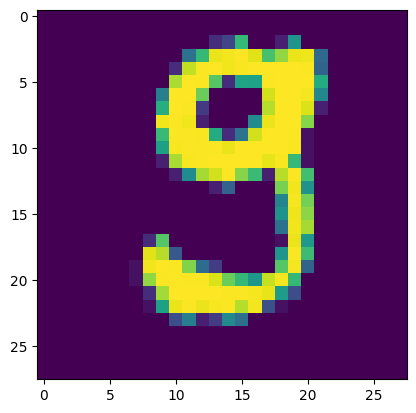

In [26]:
custom_data, custom_labels = getCustomData("customData")
custom_data.shape, custom_labels.shape
model.evaluate(custom_data, custom_labels, verbose=2)
# probability_model(custom_data[:5])
predictions = model.predict(custom_data)
for i in range(30):
    pred = predictions[i].argmax()
    if (custom_labels[i] != pred):
        print("Prediction: " + str(pred))
        print("Label: " + str(custom_labels[i]))
        plt.imshow(custom_data[i])
        plt.show()